In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('real_estate_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [3]:
df.shape

(506, 13)

<h3>Features informations:</h3>
<ul>
    <li>CRIM - per capita crime rate by town</li>
    <li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
    <li>INDUS - proportion of non-retail business acres per town.</li>
    <li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
    <li>NOX - nitric oxides concentration (parts per 10 million)</li>
    <li>RM - average number of rooms per dwelling</li>
    <li>AGE - proportion of owner-occupied units built prior to 1940</li>
    <li>DIS - weighted distances to five Boston employment centres</li>
    <li>RAD - index of accessibility to radial highways</li>
    <li>TAX - full-value property-tax rate per (10,000 dollar)</li>
    <li>PTRATIO - pupil-teacher ratio by town</li>
    <li>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
    <li>LSTAT - % lower status of the population</li>
    <li>MEDV - Median value of owner-occupied homes in $1000's</li>
</ul>

In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(394, 13)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


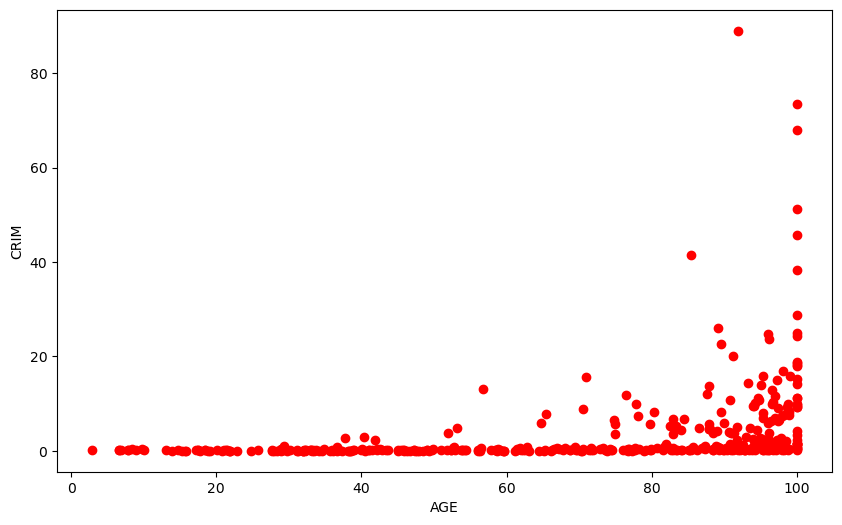

In [7]:
# plot comparing age with crime rate
plt.figure(figsize=(10,6))
plt.scatter(df['AGE'], df['CRIM'], c='red', marker='o')
plt.xlabel('AGE')
plt.ylabel('CRIM')
plt.show()

In [8]:
X = df.drop(columns=["MEDV"])
Y = df["MEDV"]

<h3>Create Regression Tree</h3>

The important parameters of DecisionTreeRegressor are
<ul>
    <li>criterion: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error</li>
    <li>max_depth - The max depth the tree can be</li>
    <li>min_samples_split - The minimum number of samples required to split a node</li>
    <li>min_samples_leaf - The minimum number of samples that a leaf can contain</li>
    <li>max_features: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training</li>
</ul>

In [20]:
score = -1
random_state = 0
while score < 0.895:
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=random_state)
    random_state += 1
    model = DecisionTreeRegressor(criterion="mse")
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)

print("score: ",score)
print("random_state: ",random_state)
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/pyth

score:  0.9031254193651457
random_state:  1958


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/pyth

In [10]:
predictions = model.predict(X_test)
print("$",(predictions-Y_test).abs().mean()*1000)

$ 2067.088607594937
